In [3]:
import rioxarray as rio
import os 
from datetime import datetime
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib import colors

output_dir="../../output"

lc_files=[f"{output_dir}/{x}" for x in os.listdir("output") if "lc" in x and x.split(".")[-1] == "tif"]
lc_files.sort()

ndvi_files=[f"{output_dir}/{x}" for x in os.listdir(output_dir) if "ndvi" in x and x.split(".")[-1] =="tif"]


BANDS=["R","G","B","RC","NIR"] 
MULTIB_DIR="../../../../data/UAV_Mapping_Niwot_Ridge_Colorado_2021/UAV_MULTISPEC" # Path to Multispectral GeoTIFF Files, each file is named by the capture date in format YYYYMMDD
OUTPUT_DIR="../../output" # Output directory for derived NDVI and Land Cover classification, the script will create the directory if it doesn't exist
TARGET_RESOLUTION=0.25 # target resolution in METERS, ensure you are using a CRS Project in meters, not degrees

ORTHO_FILES=[f"{MULTIB_DIR}/{x}" for x in os.listdir(MULTIB_DIR) if x.split(".")[-1] == "tif"] # List of paths for all mutlispectral orthomosaics 
ORTHO_FILES.sort()

DATES=[file.split("/")[-1].split("_")[0] for file in ORTHO_FILES] # Retrieve dates in YYYYMMDD
DATES=[datetime.strptime(date,"%Y%m%d").strftime("%B %d, %Y") for date in DATES]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'output'

In [27]:
ndvi_values = [rio.open_rasterio(file).isel(band=0).values for file in ndvi_files]
# rgb_values = [rio.open_rasterio(file).isel(band=slice(0,3)).values for file in ORTHO_FILES]
lc_values = [rio.open_rasterio(file).isel(band=0).values for file in lc_files]

MovieWriter Pillow unavailable; using Pillow instead.


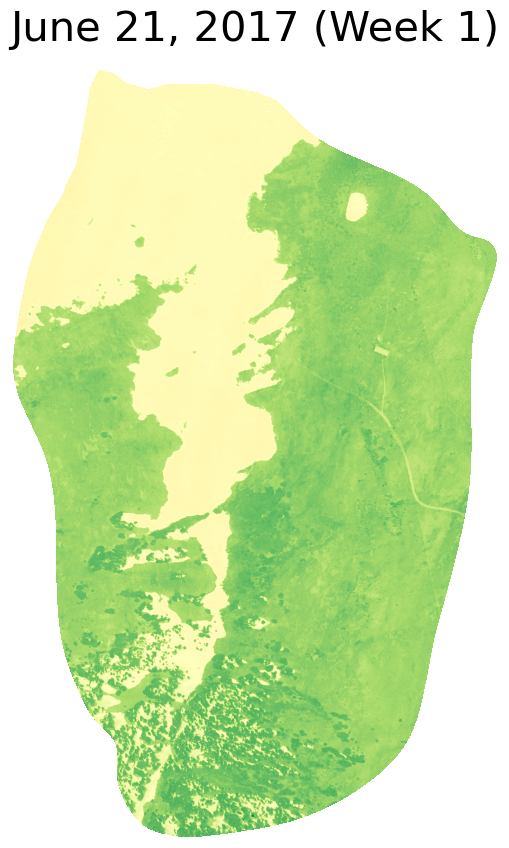

In [28]:


shape=ndvi_values[0].shape

fig = plt.figure(figsize=(10,10))
ax = plt.axes(xlim=(0, shape[1]), ylim=(shape[0], 0))

def animate(i):
    """Returns the i-th frame of the animation"""

    ax.imshow(ndvi_values[i], cmap="RdYlGn", vmin=-1,vmax=1)

    title = DATES[i]
    title = f"{DATES[i]} (Week {i+1})"
    ax.set_title(title,size = 30, pad = 20)
    ax.set_axis_off()
 
    return ax

anim = animation.FuncAnimation(fig, animate, frames=len(ndvi_values), interval=1000)
anim.save('ndvi.gif', writer='Pillow')

MovieWriter Pillow unavailable; using Pillow instead.


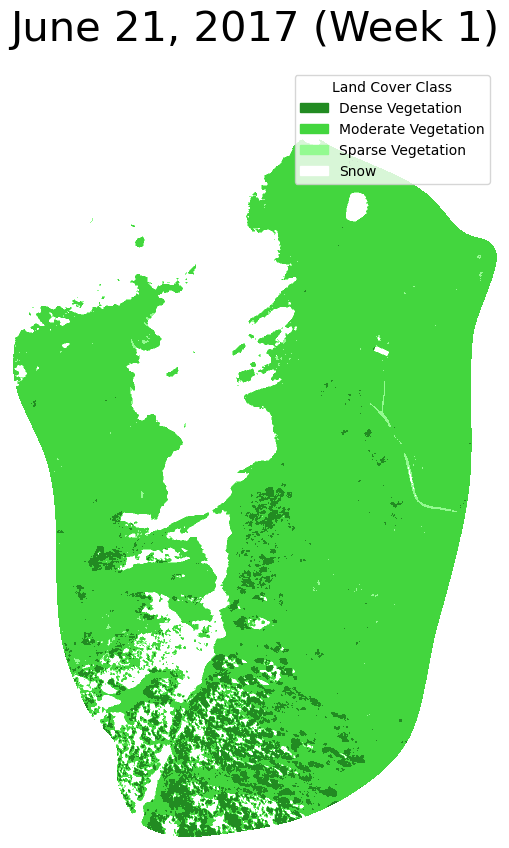

In [26]:

shape=lc_values[0].shape

fig = plt.figure(figsize=(20,10))
ax = plt.axes(xlim=(0, shape[1]), ylim=(shape[0], 0))
labels=["Dense Vegetation","Moderate Vegetation","Sparse Vegetation","Snow"] 
color=["#228B22", "#43d63e", "#94fa91", "white"]

cmap = colors.ListedColormap(color)

def animate_lc(i):
    """Returns the i-th frame of the animation"""

    ax.imshow(lc_values[i], cmap=cmap)
    handles = [plt.Rectangle((0, 0), 0, 0, color=color[c], label=labels[c]) for c in range(0,len(labels))]
    ax.legend(handles=handles, title='Land Cover Class', loc="upper right")
    
    title = f"{DATES[i]} (Week {i+1})"
    ax.set_title(title,size = 30, pad = 20)
    ax.set_axis_off()
 
    return ax

anim = animation.FuncAnimation(fig, animate_lc, frames=len(lc_values), interval=1000)
anim.save('lc.gif', writer='Pillow')